In [1]:
import torch
import numpy as np
from PIL import Image
import matplotlib
import matplotlib.pyplot as plt
from torchmetrics.functional import pairwise_cosine_similarity as cos_dist
from sklearn import metrics

In [2]:
with open('preprocessing/labels.txt') as f:
    labels = {
        int(line[22:25].strip()):
        (line[:22].strip().replace("'", ""), 
         int(line[25:].strip()))
        for line in f.readlines()
    }

eval_labels = [i for i in labels if 0 <= labels[i][1] < 255]

eval_label_names = [labels[i][0] for i in labels if 0 <= labels[i][1] < 255]

In [3]:
eval_labels

[7, 8, 11, 12, 13, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 31, 32, 33]

In [4]:
n=j=0

In [23]:
# preds = np.load('eval_cs4pc_upsampled_256_val_both_frozen_test_epoch_99.npy', allow_pickle=True).item()
# preds = np.load('eval_cs4pc_upsampled_256_val_both_frozen_test_epoch_99.npy', allow_pickle=True).item()
# preds = np.load('/home/hkhachatrian/mae/annotations/eval_cs_256_epoch=84_linear_1.npy', allow_pickle=True).item()
# preds = np.load('/home/hkhachatrian/mae/annotations/eval_cs_256_epoch=99_linear_frozen_1.npy', allow_pickle=True).item()
# preds = np.load('/home/hkhachatrian/mae/annotations/eval_cs_256_epoch=59.npy', allow_pickle=True).item()
preds = np.load('/home/hkhachatrian/mae/annotations/eval_cs4pc_upsampled_256_val_sq_weighted.npy', allow_pickle=True) #.item()

In [22]:
!ls -lah /home/hkhachatrian/mae/annotations/ | grep ups


-rw-rw-r--  1 hkhachatrian hkhachatrian 1.5G Feb 20 12:00 cs4pc_upsampled_19_val_for_eval.npy
-rw-rw-r--  1 hkhachatrian hkhachatrian 601M Feb 23 09:42 cs4pc_upsampled_256_val.npy
-rw-rw-r--  1 hkhachatrian hkhachatrian 1.5G Feb 21 11:38 cs4pc_upsampled_400_train.npy
-rw-rw-r--  1 hkhachatrian hkhachatrian 601M Feb 21 11:40 cs4pc_upsampled_400_val.npy
-rw-rw-r--  1 hkhachatrian hkhachatrian 601M Feb 23 09:15 cs4pc_upsampled_400_val_weighted.npy
-rw-rw-r--  1 hkhachatrian hkhachatrian 601M Feb 23 09:43 cs4pc_upsampled_512_val.npy
-rw-rw-r--  1 hkhachatrian hkhachatrian 601M Feb 23 08:03 cs4pc_upsampled_512_val_weighted.npy
-rw-rw-r--  1 hkhachatrian hkhachatrian 1.5G Feb 20 11:31 cs4pc_upsampled_val_for_eval.npy
-rw-rw-r--  1 hkhachatrian hkhachatrian 601M Mar  9 07:10 eval_clip_cs4pc_upsampled_256_val_contrastive_dino_epoch_19.npy
-rw-rw-r--  1 hkhachatrian hkhachatrian 601M Feb 27 10:17 eval_cs4pc_upsampled_128_val_contrastive_epoch_14.npy
-rw-rw-r--  1 hkhachatrian hkhachatrian 601M 

In [24]:
preds[0].keys()

dict_keys(['file_name', 'id', 'patch_labels', 'resized_img', 'black_image', 'patch_labels_14x14'])

In [25]:
preds[0]['patch_labels'].shape, preds[0]['black_image'].shape#.resize(14, 14)

((1024, 2048), (1024, 2048))

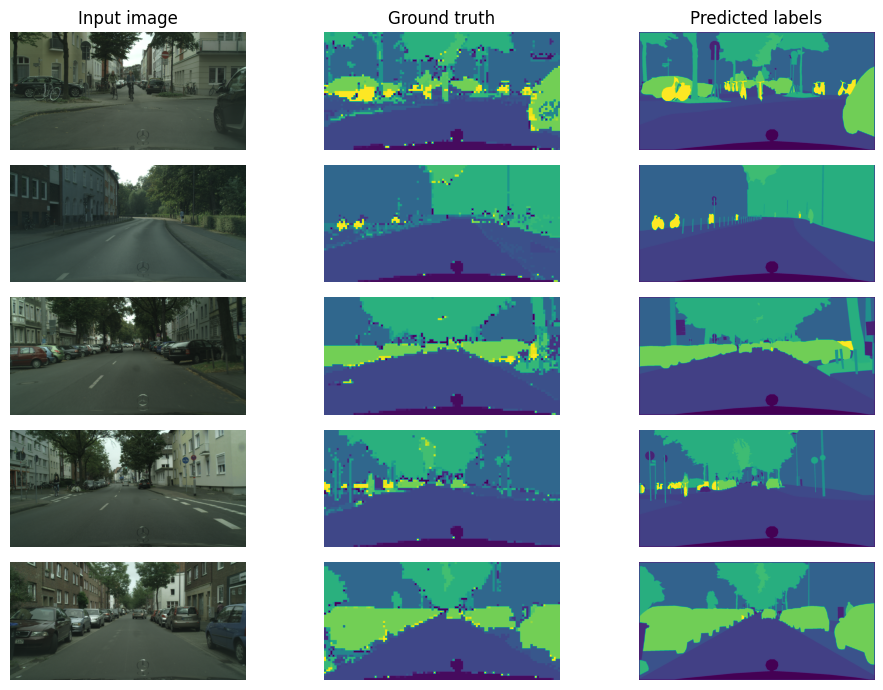

In [29]:
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(10, 7))
axes[0, 0].title.set_text("Input image")
axes[0, 1].title.set_text("Ground truth")
axes[0, 2].title.set_text("Predicted labels")
for i in range(5):
    axes[i, 0].imshow(np.array(Image.open(preds[i]['file_name'])))
    axes[i, 0].set_ylabel(f"#{i}")
    axes[i, 1].imshow(preds[i]['patch_labels'])
    axes[i, 2].imshow(preds[i]['black_image'])
    axes[i, 0].set_axis_off()
    axes[i, 1].set_axis_off()
    axes[i, 2].set_axis_off()
plt.xticks([], [])
plt.tight_layout()

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

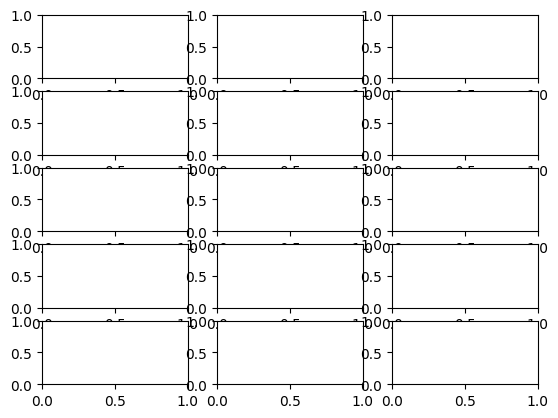

In [13]:
fig, axes = plt.subplots(nrows=5, ncols=3)
for i in range(5):
    axes[i, 0].imshow(np.array(Image.open(preds['images'][i]['file_name'])))
    axes[i, 1].imshow(preds['images'][i]['patch_labels'].reshape(14, 14))
    axes[i, 2].imshow(preds['images'][i]['labels'].reshape(14, 14))
    

In [35]:
len(preds['images'])/30

32.0

In [36]:
preds['images'][i]['labels'].shape

(196,)

In [90]:
truth = np.concatenate([im['labels'] for im in preds['images']])
predictions = np.concatenate([im['patch_labels'] for im in preds['images']])

In [91]:
cm = metrics.confusion_matrix(
    truth,
    predictions,
    labels = eval_labels
)

Text(0.5, 1.0, '256 w=1 \ncontrastive')

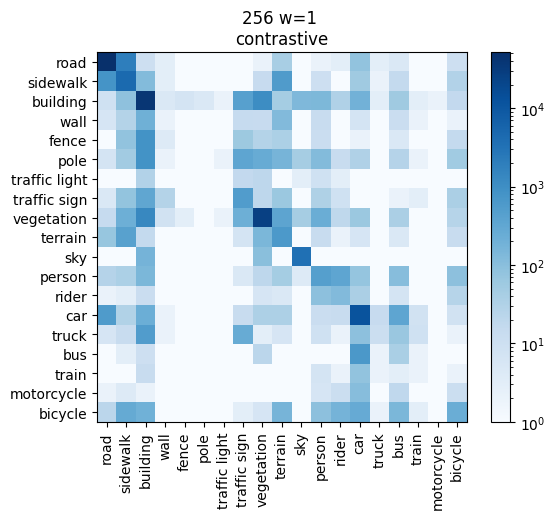

In [93]:
plt.figure()
plt.imshow(1+cm, norm=matplotlib.colors.LogNorm(), cmap='Blues')
plt.yticks(range(len(eval_labels)), eval_label_names)
plt.xticks(range(len(eval_labels)), eval_label_names, rotation=90)
plt.colorbar()
plt.title('256 w=1 \ncontrastive')

In [ ]:
num_images = 5
offset = n

imagenet_mean = torch.tensor([0.485, 0.456, 0.406])
imagenet_std = torch.tensor([0.229, 0.224, 0.225])

fig, ax = plt.subplots(5, 3+5, figsize=(20, 10))
ax[0,0].title.set_text("Input image")
ax[0,1].title.set_text("Ground truth")
ax[0,2].title.set_text("Predicted labels")
# for l in range(6):
#     ax[0,l+3].title.set_text(f"{names[l]}")
for i in range(offset, num_images + offset):
    dist = cos_dist(emb_img_l['images'][i]['embedings'].to('cpu'), ref_mean)
    
    ax[i-offset,0].set_ylabel(f"#{i}")
    ax[i-offset,0].imshow(emb_img_l['images'][i]['images'].to('cpu').permute((1,2,0)) * imagenet_std + imagenet_mean)
    ax[i-offset,1].imshow(emb_img_l['images'][i]['labels'].to('cpu').reshape((14,14)), cmap='nipy_spectral', vmin=0, vmax=37)
    ax[i-offset,2].imshow(dist.argmax(-1).reshape((14,14)), cmap='nipy_spectral', vmin=0, vmax=37)
    for l in range(5):
        ax[i-offset,l+3].imshow(dist[:,l].reshape((14,14)), cmap='Reds', vmin=0, vmax=1)
        
# plt.savefig(f'./images/fair1m_inference_val_500epochs_{j}.png')
j += 1
n += 5

In [20]:
emb_img_l = torch.load('./annotations/eval_cs_epoch=24.npy')

# embeds = emb_img_l['embedings'].to('cpu')
# imgs = emb_img_l['images'].to('cpu')
# labels = emb_img_l['labels'].to('cpu')
# ref_mean = emb_img_l['reference_mean'].to('cpu')

In [21]:
ref_mean = emb_img_l['reference_mean'].to('cpu')

In [22]:
emb_img_l['images'][0]

{'file_name': '/mnt/lwll/lwll-coral/hrant/cs4pc_200/val/munster_000097_000019_leftImg8bit.200_0_0.png',
 'patch_labels': tensor([38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38,
         38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38,
         38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38,
         38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38,
         38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38,
         38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38,
         38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38,
         38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38,
         38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38,
         38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38,
         38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 3

In [5]:
ref_mean = ref_mean.nan_to_num(1)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


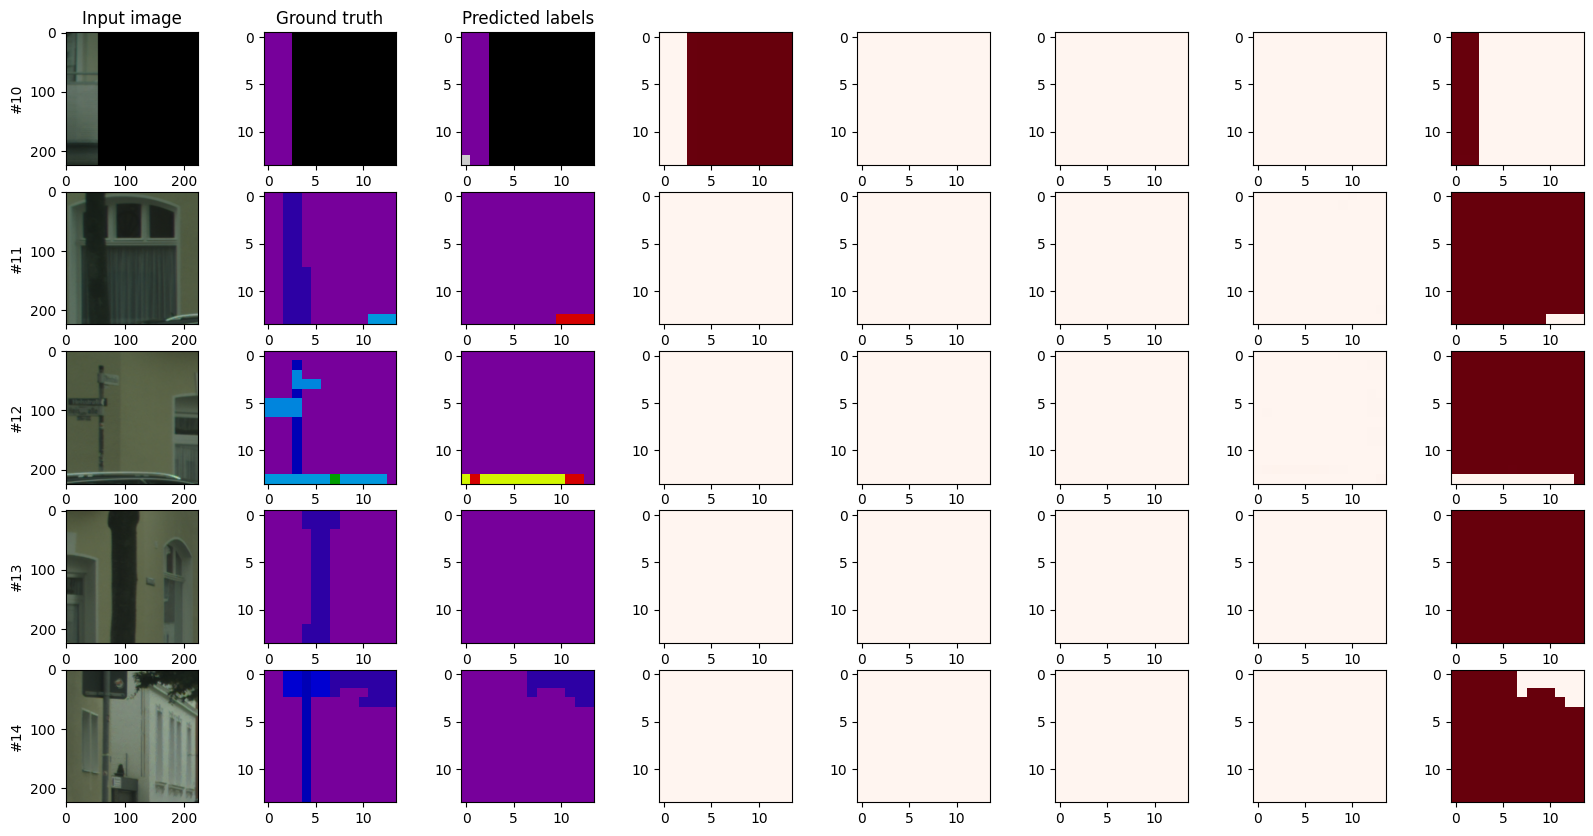

In [11]:
num_images = 5
offset = n

imagenet_mean = torch.tensor([0.485, 0.456, 0.406])
imagenet_std = torch.tensor([0.229, 0.224, 0.225])

fig, ax = plt.subplots(5, 3+5, figsize=(20, 10))
ax[0,0].title.set_text("Input image")
ax[0,1].title.set_text("Ground truth")
ax[0,2].title.set_text("Predicted labels")
# for l in range(6):
#     ax[0,l+3].title.set_text(f"{names[l]}")
for i in range(offset, num_images + offset):
    dist = cos_dist(emb_img_l['images'][i]['embedings'].to('cpu'), ref_mean)
    
    ax[i-offset,0].set_ylabel(f"#{i}")
    ax[i-offset,0].imshow(emb_img_l['images'][i]['images'].to('cpu').permute((1,2,0)) * imagenet_std + imagenet_mean)
    ax[i-offset,1].imshow(emb_img_l['images'][i]['labels'].to('cpu').reshape((14,14)), cmap='nipy_spectral', vmin=0, vmax=37)
    ax[i-offset,2].imshow(dist.argmax(-1).reshape((14,14)), cmap='nipy_spectral', vmin=0, vmax=37)
    for l in range(5):
        ax[i-offset,l+3].imshow(dist[:,l].reshape((14,14)), cmap='Reds', vmin=0, vmax=1)
        
# plt.savefig(f'./images/fair1m_inference_val_500epochs_{j}.png')
j += 1
n += 5

In [14]:
import cv2

In [23]:
x = dist.argmax(-1).reshape(14, 14)
x

tensor([[4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5],
        [4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5],
        [4, 4, 4, 4, 4, 4, 4, 5, 4, 4, 4, 5, 5, 5],
        [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5],
        [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4],
        [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4],
        [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4],
        [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4],
        [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4],
        [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4],
        [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4],
        [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4],
        [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4],
        [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]])

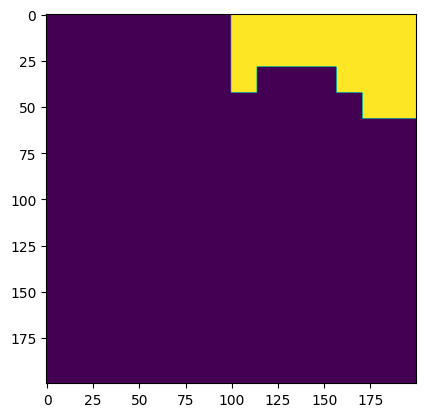

In [19]:
plt.imshow(cv2.resize(dist.argmax(1).reshape(14, 14).to('cpu').numpy(), (200, 200), interpolation=cv2.INTER_NEAREST_EXACT))

In [56]:
emb_img_l = torch.load('inference/inference_results/embedings_cs_epoch=14.pth')

embeds = emb_img_l['embedings'].to('cpu')
imgs = emb_img_l['images'].to('cpu')
labels = emb_img_l['labels'].to('cpu')
ref_mean = emb_img_l['reference_mean'].to('cpu')

ref_mean = ref_mean.nan_to_num(1)
n=j=0

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


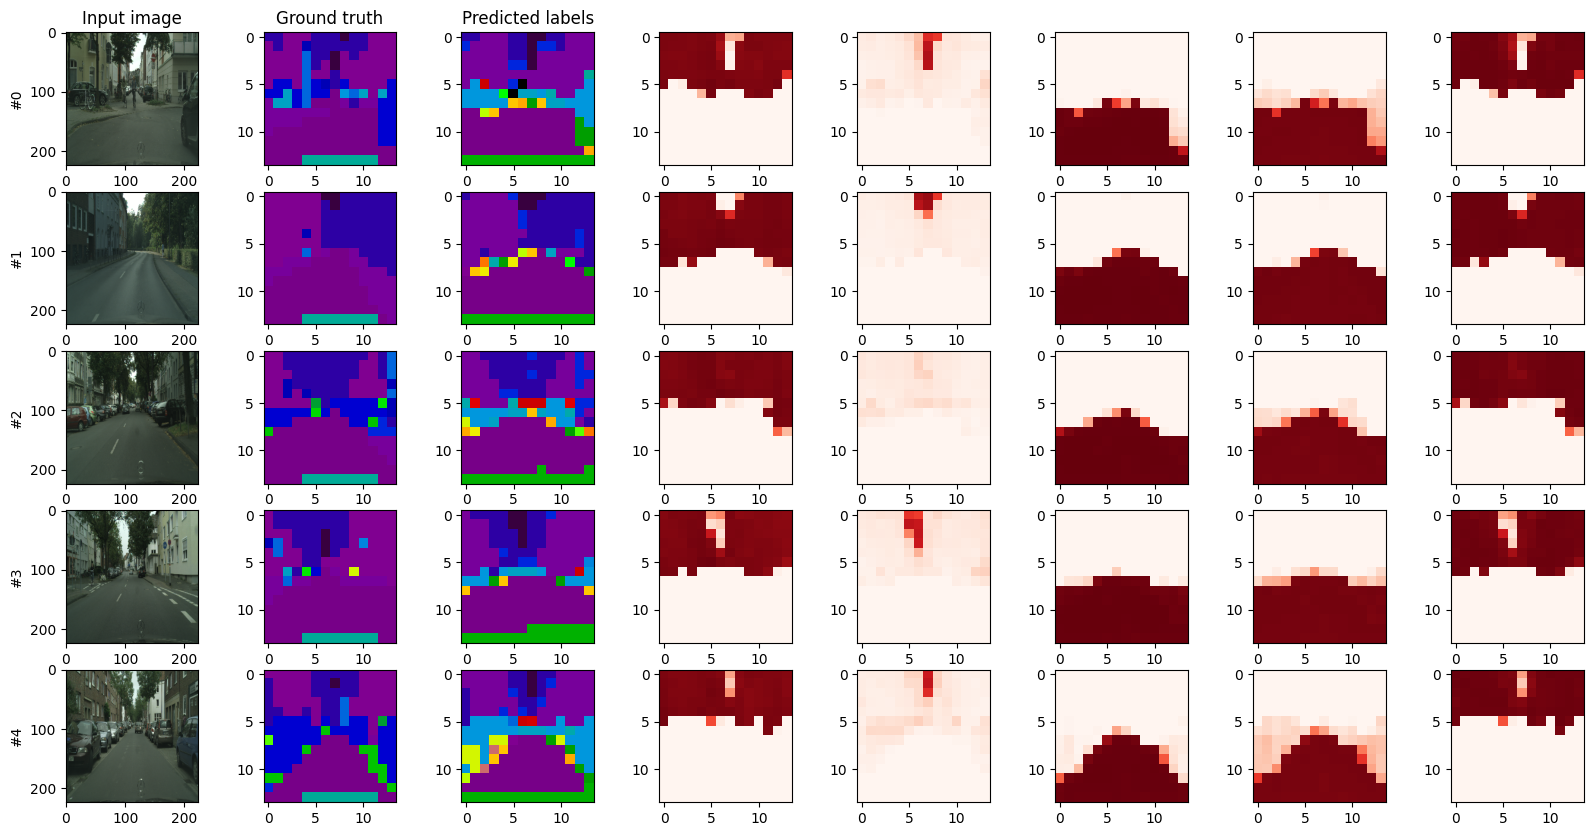

In [57]:
num_images = 5
offset = n

imagenet_mean = torch.tensor([0.485, 0.456, 0.406])
imagenet_std = torch.tensor([0.229, 0.224, 0.225])

fig, ax = plt.subplots(5, 3+5, figsize=(20, 10))
ax[0,0].title.set_text("Input image")
ax[0,1].title.set_text("Ground truth")
ax[0,2].title.set_text("Predicted labels")
# for l in range(6):
#     ax[0,l+3].title.set_text(f"{names[l]}")
for i in range(offset, num_images + offset):
    dist = cos_dist(embeds[i], ref_mean)
    
    ax[i-offset,0].set_ylabel(f"#{i}")
    ax[i-offset,0].imshow(imgs[i].permute((1,2,0)) * imagenet_std + imagenet_mean)
    ax[i-offset,1].imshow(labels[i].reshape((14,14)), cmap='nipy_spectral', vmin=0, vmax=37)
    ax[i-offset,2].imshow(dist.argmax(-1).reshape((14,14)), cmap='nipy_spectral', vmin=0, vmax=37)
    for l in range(5):
        ax[i-offset,l+3].imshow(dist[:,l].reshape((14,14)), cmap='Reds', vmin=0, vmax=1)
        
# plt.savefig(f'./images/fair1m_inference_val_500epochs_{j}.png')
j += 1
n += 5

In [58]:
import os

In [61]:
os.path.join('/dgfsjh/dhjysg/kijvb', '/fbidugbf/fbjhjb', '/bhhv')

'/bhhv'